In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   # for heatmap
from my_functions import *
import re

In [15]:
# Load the data
data = pd.read_csv("../files/input/AMVA_Accidentalidad_20191022_2.csv", encoding="latin1", sep=";").copy()
data = clean_data(data)
#se eliminan los barrios sin información, ya que "BARRIO" es un parametro para el modelo
data = delete_barrios_sin_info(data)
data


c:\Users\BRAYAN\Desktop\BootCamp\Prueba\Project_BootCamp\homework\my_functions.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].str.strip().str.lower()


,COD_MUNICIPIO,MUNICIPIO,FECHA,HORA,DÍA DE LA SEMANA,CLASE,DIRECCIÓN,GRAVEDAÑOSSADAÑOSS,BARRIO,COMUNA,DISEÑO
0,79.0,barbosa,03/01/2015,01:00:00 pm,sabado,choque,via bello hatillo km16+200,heridos,el hatillo,sin información,tramo de via
1,79.0,barbosa,07/01/2015,03:00:00 pm,miercoles,choque,hatillo-bello km 18+00,heridos,parque principal,sin información,tramo de via
2,79.0,barbosa,04/01/2015,04:01:00 am,domingo,choque,km 16+395 metros barbosa-hatillo,heridos,via el hatillo-cisneros,sin información,tramo de via
3,79.0,barbosa,05/01/2015,12:00:00 pm,lunes,choque,bello- don matias km 9+600,heridos,el hatillo,sin información,tramo de via
4,79.0,barbosa,11/01/2015,01:30:00 pm,domingo,choque,los abuelos,daños,parque principal,sin información,tramo de via
...,...,...,...,...,...,...,...,...,...,...,...
194555,1.0,medellín,22/05/2015,7:35:00,viernes,atropello,cl 65 cr 77 49,muertos,san germán,robledo,sin información
194556,1.0,medellín,22/05/2015,14:30:00,viernes,atropello,cl 48 cr 4 131,muertos,barrio de jesús,buenos aires,sin información
194557,1.0,medellín,22/05/2015,20:15:00,viernes,atropello,cr 55 cl 64,muertos,jesús nazareno,la candelaria,sin información
194558,1.0,medellín,25/05/2015,0:58:00,lunes,atropello,cl 44 cr 60 40,muertos,corazón de jesús,la candelaria,sin información


In [33]:
import re

def convertir_fecha(fecha):
    fecha = fecha.strip()

    # Intentamos extraer los dos valores: día y mes
    match = re.match(r'(\d{2})/(\d{2})/\d{4}', fecha)  # Formato DD/MM/YYYY o MM/DD/YYYY
    if match:
        dia = match.group(1)  # El valor antes del primer "/"
        mes = match.group(2)  # El valor entre los dos "/"
        return dia, mes  # Devolvemos ambos valores como una tupla

    return None, None  # En caso de no encontrar el formato esperado

# Casos de prueba
test_cases = [
    "23/03/2025",     # Caso válido
    " 23/03/2025 ",   # Con espacios adicionales
    "03/23/2025",     # Formato MM/DD/YYYY
    "23-03-2025",     # Caracteres incorrectos
    "32/13/2025",     # Fecha fuera de rango
    "00/00/0000"      # Fecha completamente incorrecta
]

# Ejecutar las pruebas
for fecha in test_cases:
    print(f"Fecha: {fecha} -> {convertir_fecha(fecha)}")


Fecha: 23/03/2025 -> ('23', '03')
Fecha:  23/03/2025  -> ('23', '03')
Fecha: 03/23/2025 -> ('03', '23')
Fecha: 23-03-2025 -> (None, None)
Fecha: 32/13/2025 -> ('32', '13')
Fecha: 00/00/0000 -> ('00', '00')


In [34]:
caracteres_unicos = set(''.join(data["FECHA"].astype(str)))

# Mostrar los caracteres únicos encontrados
print(caracteres_unicos)

{'6', '2', '7', '/', '5', '1', '3', '4', '8', '0', '9'}


In [17]:
import re

def convertir_fecha(fecha):
    fecha = fecha.strip()

    # Usamos una expresión regular para extraer el mes (que está entre "/" y "/")
    match = re.match(r'\d{2}/(\d{2})/\d{4}', fecha)  # Formato DD/MM/YYYY
    if match:
        return match.group(1)  # El grupo 1 corresponde al mes
    return None  # En caso de que no coincida con el formato

data["MES"] = data["FECHA"].apply(convertir_fecha)



In [18]:
# Aplicar la función para convertir la hora
data["HORA24"] = data["HORA"].apply(convertir_hora)

In [19]:
# contar la cantidad de accidentes por mes
accidentes_mes = data["MES"].value_counts().sort_index()
accidentes_mes

MES
01    12617
02    14018
03    14556
04    14221
05    15012
06    10547
07    11409
08    11962
09    11743
10    11532
11    10791
12    11041
13      263
14      302
15      331
16      339
17      319
18      284
19      302
20      259
21      252
22      284
23      302
24      287
25      283
26      295
27      309
28      287
29      281
30      287
31      188
Name: count, dtype: int64

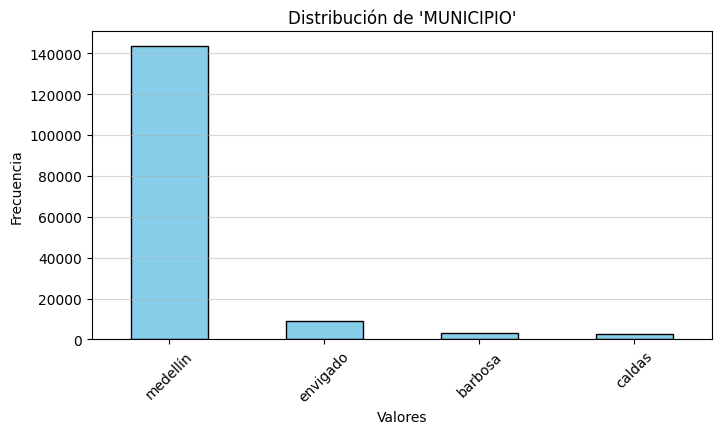

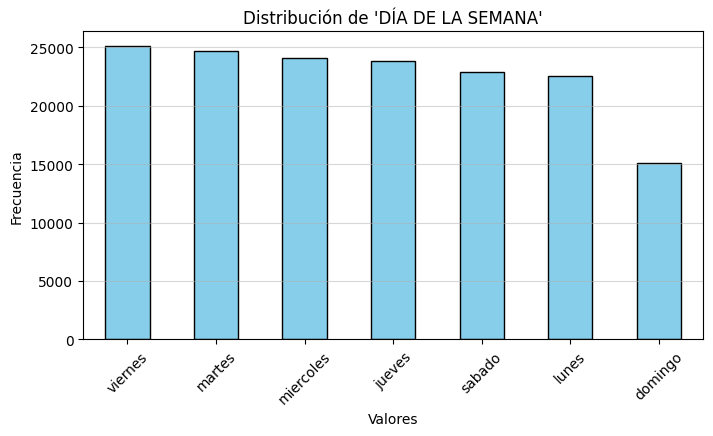

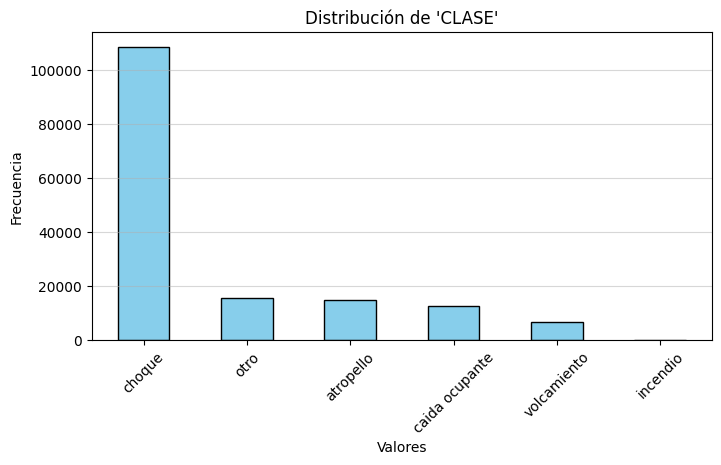

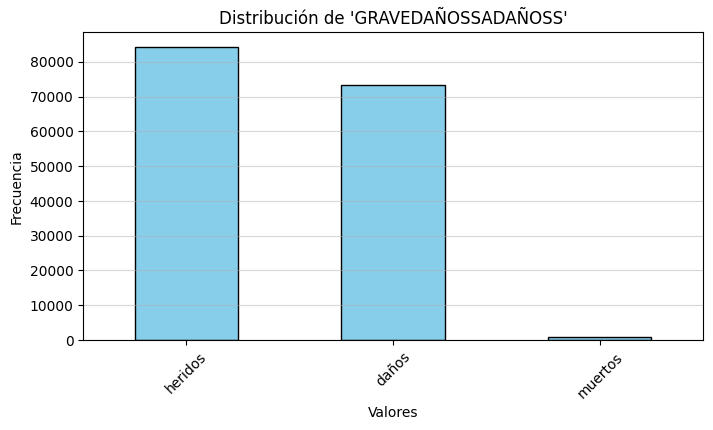

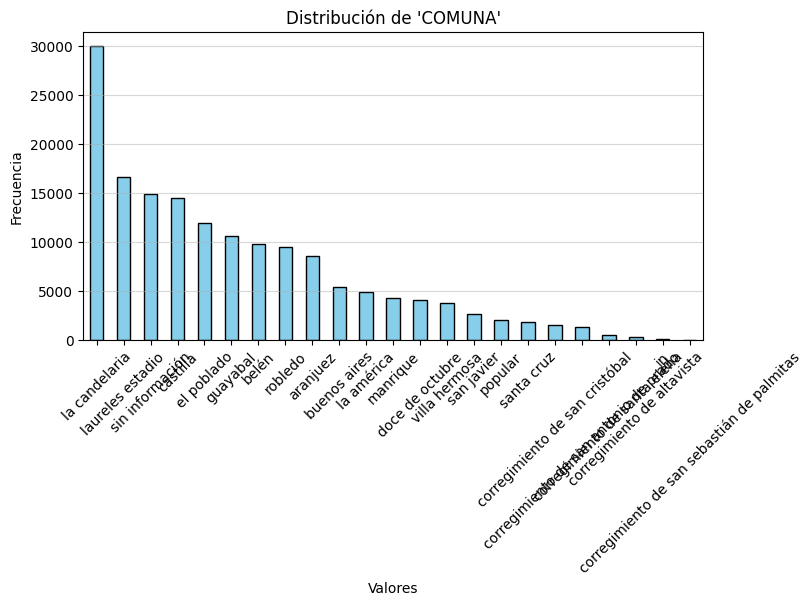

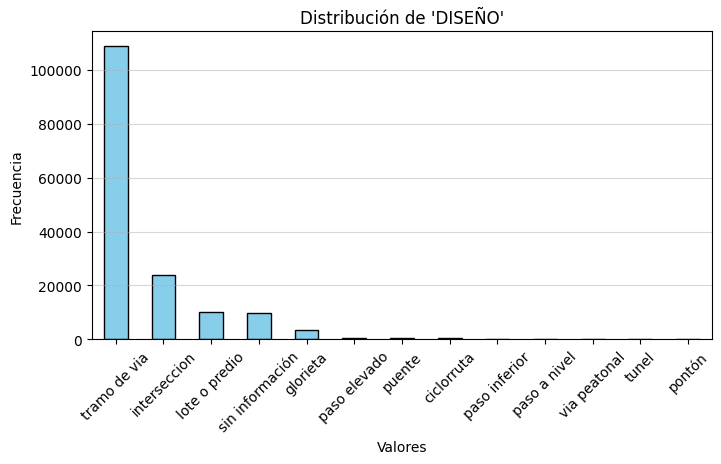

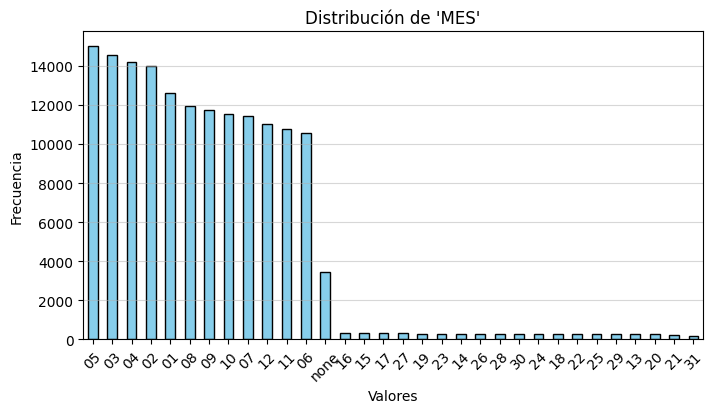

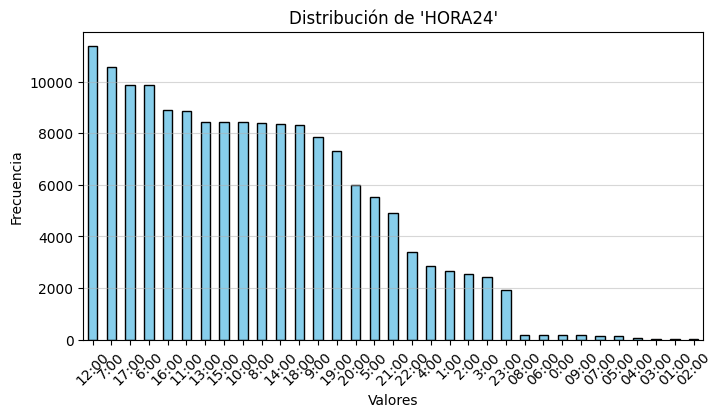

In [20]:
graficar_histogramas(data)

In [21]:
data_dead = set(data["BARRIO"])
df_data_dead = pd.DataFrame(data_dead, columns=["BARRIO"])
df_data_dead = df_data_dead.sort_values(by="BARRIO")
df_data_dead.head(50)

,BARRIO
389,aguas frias
166,alcala
231,aldea pablo vi
151,alejandro echavarría
114,alejandría
138,alfonso lópez
66,altamira
281,altavista
328,altavista sector central
225,alto de minas
